## NAME: SOURI RISHIK VOLETY
## REG NO: 230968004

## QUESTION 1 - TIME SERIES

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

2025-08-28 09:22:12.467250: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-28 09:22:12.496203: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-28 09:22:12.927372: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
def generate_time_series(sample_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) 
    series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5)  
    return series[..., np.newaxis].astype(np.float32)

In [4]:
n_samples = 10000
n_steps = 51

series = generate_time_series(n_samples, n_steps)

X = series[:, :50, :]
y = series[:, 50, 0]

In [5]:
train_size = int(0.7 * n_samples)
val_size = int(0.2 * n_samples)
test_size = n_samples - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (7000, 50, 1), (7000,)
Validation set: (2000, 50, 1), (2000,)
Test set: (1000, 50, 1), (1000,)


In [6]:
def build_fully_connected():
    model = models.Sequential([
        layers.Flatten(input_shape=(50, 1)),
        layers.Dense(100, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def build_simple_rnn_1layer():
    model = models.Sequential([
        layers.SimpleRNN(50, activation='relu', input_shape=(50,1)),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def build_simple_rnn_2layers():
    model = models.Sequential([
        layers.SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(50,1)),
        layers.SimpleRNN(25, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model
    
def train_and_evaluate(model, name):
    print(f"\nTraining {name}...")
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=64,
        validation_data=(X_val, y_val),
        verbose=2
    )
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")
    return history, test_loss, test_mae

In [7]:
fc_model = build_fully_connected()
rnn_1_model = build_simple_rnn_1layer()
rnn_2_model = build_simple_rnn_2layers()

fc_history, fc_test_loss, fc_test_mae = train_and_evaluate(fc_model, "Fully Connected NN")
rnn1_history, rnn1_test_loss, rnn1_test_mae = train_and_evaluate(rnn_1_model, "Simple RNN 1 layer")
rnn2_history, rnn2_test_loss, rnn2_test_mae = train_and_evaluate(rnn_2_model, "Simple RNN 2 layers")

print("\nSummary of Test Performance (MSE and MAE):")
print(f"Fully Connected NN: Loss={fc_test_loss:.4f}, MAE={fc_test_mae:.4f}")
print(f"Simple RNN 1 layer: Loss={rnn1_test_loss:.4f}, MAE={rnn1_test_mae:.4f}")
print(f"Simple RNN 2 layers: Loss={rnn2_test_loss:.4f}, MAE={rnn2_test_mae:.4f}")


Training Fully Connected NN...
Epoch 1/20


2025-08-28 09:22:13.591268: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-08-28 09:22:13.591301: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: computinglab26-03
2025-08-28 09:22:13.591304: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: computinglab26-03
2025-08-28 09:22:13.591386: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2025-08-28 09:22:13.591398: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2025-08-28 09:22:13.591400: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


110/110 - 0s - loss: 0.0253 - mae: 0.1183 - val_loss: 0.0076 - val_mae: 0.0701 - 494ms/epoch - 4ms/step
Epoch 2/20
110/110 - 0s - loss: 0.0056 - mae: 0.0598 - val_loss: 0.0046 - val_mae: 0.0540 - 111ms/epoch - 1ms/step
Epoch 3/20
110/110 - 0s - loss: 0.0040 - mae: 0.0505 - val_loss: 0.0043 - val_mae: 0.0526 - 153ms/epoch - 1ms/step
Epoch 4/20
110/110 - 0s - loss: 0.0034 - mae: 0.0466 - val_loss: 0.0035 - val_mae: 0.0476 - 187ms/epoch - 2ms/step
Epoch 5/20
110/110 - 0s - loss: 0.0031 - mae: 0.0447 - val_loss: 0.0036 - val_mae: 0.0478 - 167ms/epoch - 2ms/step
Epoch 6/20
110/110 - 0s - loss: 0.0028 - mae: 0.0424 - val_loss: 0.0032 - val_mae: 0.0455 - 156ms/epoch - 1ms/step
Epoch 7/20
110/110 - 0s - loss: 0.0027 - mae: 0.0417 - val_loss: 0.0034 - val_mae: 0.0467 - 158ms/epoch - 1ms/step
Epoch 8/20
110/110 - 0s - loss: 0.0026 - mae: 0.0412 - val_loss: 0.0036 - val_mae: 0.0487 - 84ms/epoch - 760us/step
Epoch 9/20
110/110 - 0s - loss: 0.0026 - mae: 0.0409 - val_loss: 0.0034 - val_mae: 0.0470 

## QUESTION 2 - GOOGLE STOCK PRICE DATASET

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [9]:
df = pd.read_csv('google_stock.csv')

In [10]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
features = ['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'open', 'high', 'low', 'volume']
target = 'close'
df = df[(df['date'].dt.year >= 2015) & (df['date'].dt.year <= 2021)]

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_all = scaler_X.fit_transform(df[features])
y_all = scaler_y.fit_transform(df[[target]])

def create_sequences(X, y, time_steps=30):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 30
X_seq, y_seq = create_sequences(X_all, y_all, TIME_STEPS)

dates = df['date'].values[TIME_STEPS:]

train_mask = dates < np.datetime64('2020-01-01')
test_mask = (dates >= np.datetime64('2020-01-01')) & (dates <= np.datetime64('2021-12-31'))

X_train, y_train = X_seq[train_mask], y_seq[train_mask]
X_test, y_test = X_seq[test_mask], y_seq[test_mask]

print(f'Train shape: {X_train.shape}, {y_train.shape}')
print(f'Test shape: {X_test.shape}, {y_test.shape}')

Train shape: (864, 30, 9), (864, 1)
Test shape: (364, 30, 9), (364, 1)


In [12]:
def build_rnn_model(input_shape, dropout_rate=0.2):
    model = models.Sequential([
        layers.SimpleRNN(64, activation='relu', return_sequences=True, input_shape=input_shape),
        layers.Dropout(dropout_rate),
        layers.SimpleRNN(32, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])
    return model

model = build_rnn_model(input_shape=(TIME_STEPS, len(features)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 30, 64)            4736      
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7873 (30.75 KB)
Trainable params: 7873 (30.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/50
11/11 - 1s - loss: 0.0298 - mean_absolute_percentage_error: 82.3775 - val_loss: 5.8535e-04 - val_mean_absolute_percentage_error: 6.1549 - 949ms/epoch - 86ms/step
Epoch 2/50
11/11 - 0s - loss: 0.0094 - mean_absolute_percentage_error: 46.1413 - val_loss: 0.0037 - val_mean_absolute_percentage_error: 19.9803 - 65ms/epoch - 6ms/step
Epoch 3/50
11/11 - 0s - loss: 0.0053 - mean_absolute_percentage_error: 34.7693 - val_loss: 7.2377e-04 - val_mean_absolute_percentage_error: 7.8792 - 65ms/epoch - 6ms/step
Epoch 4/50
11/11 - 0s - loss: 0.0041 - mean_absolute_percentage_error: 30.3641 - val_loss: 0.0013 - val_mean_absolute_percentage_error: 11.1068 - 66ms/epoch - 6ms/step
Epoch 5/50
11/11 - 0s - loss: 0.0030 - mean_absolute_percentage_error: 27.2341 - val_loss: 2.9168e-04 - val_mean_absolute_percentage_error: 4.5301 - 66ms/epoch - 6ms/step
Epoch 6/50
11/11 - 0s - loss: 0.0028 - mean_absolute_percentage_error: 25.8421 - val_loss: 6.6200e-04 - val_mean_absolute_percentage_error: 7.7904 - 

In [14]:
test_loss, test_mape = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAPE: {test_mape:.4f}")

Test MSE: 0.0040
Test MAPE: 9.6000


In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/100
11/11 - 0s - loss: 6.6517e-04 - mean_absolute_percentage_error: 11.8632 - val_loss: 3.0457e-04 - val_mean_absolute_percentage_error: 4.7458 - 83ms/epoch - 8ms/step
Epoch 2/100
11/11 - 0s - loss: 6.1939e-04 - mean_absolute_percentage_error: 11.3910 - val_loss: 2.9560e-04 - val_mean_absolute_percentage_error: 4.6963 - 62ms/epoch - 6ms/step
Epoch 3/100
11/11 - 0s - loss: 5.8091e-04 - mean_absolute_percentage_error: 10.9635 - val_loss: 3.4532e-04 - val_mean_absolute_percentage_error: 5.1048 - 60ms/epoch - 5ms/step
Epoch 4/100
11/11 - 0s - loss: 5.0803e-04 - mean_absolute_percentage_error: 10.6675 - val_loss: 5.1763e-04 - val_mean_absolute_percentage_error: 6.3807 - 60ms/epoch - 5ms/step
Epoch 5/100
11/11 - 0s - loss: 5.4428e-04 - mean_absolute_percentage_error: 11.2624 - val_loss: 7.8077e-04 - val_mean_absolute_percentage_error: 8.3774 - 59ms/epoch - 5ms/step
Epoch 6/100
11/11 - 0s - loss: 6.0292e-04 - mean_absolute_percentage_error: 12.6575 - val_loss: 6.0189e-04 - val_mean_ab

12/12 [==============================] - 0s 2ms/step


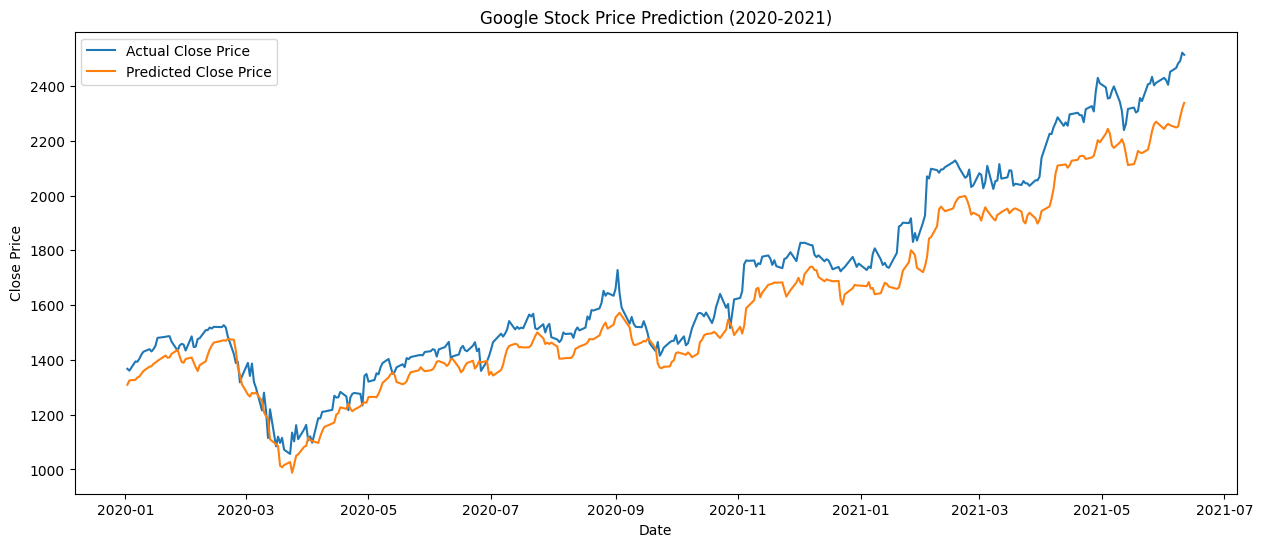

In [16]:
y_pred_scaled = model.predict(X_test)

y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

dates_test = dates[test_mask]

plt.figure(figsize=(15,6))
plt.plot(dates_test, y_true, label='Actual Close Price')
plt.plot(dates_test, y_pred, label='Predicted Close Price')
plt.title('Google Stock Price Prediction (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## QUESTION 3 - BURGLARY DATASET

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('Burglary_Dataset.csv')
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11-12-2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11-12-2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11-12-2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11-12-2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11-12-2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285807 entries, 0 to 285806
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        285807 non-null  object 
 1   CrimeTime        285807 non-null  object 
 2   CrimeCode        285807 non-null  object 
 3   Location         284184 non-null  object 
 4   Description      285807 non-null  object 
 5   Inside/Outside   281611 non-null  object 
 6   Weapon           97396 non-null   object 
 7   Post             285616 non-null  float64
 8   District         285749 non-null  object 
 9   Neighborhood     284106 non-null  object 
 10  Location 1       284188 non-null  object 
 11  Total Incidents  285807 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 26.2+ MB


In [44]:
df.isnull().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             1623
Description             0
Inside/Outside       4196
Weapon             188411
Post                  191
District               58
Neighborhood         1701
Location 1           1619
Total Incidents         0
dtype: int64

In [45]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'],format = 'mixed')#so convert that to datetime
df_train = df[(df['CrimeDate'].dt.year >=2014) & (df['CrimeDate'].dt.year <=2015)]
df_test =  df[df['CrimeDate'].dt.year == 2016]

In [46]:
df_train

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
644,2015-10-07,00:15:00,4E,NaN,COMMON ASSAULT,I,HANDS,535.0,NORTHERN,NaN,NaN,1
1459,2015-02-22,14:27:00,4E,NaN,COMMON ASSAULT,O,HANDS,835.0,SOUTHWESTERN,NaN,NaN,1
1999,2014-02-26,09:55:00,4E,NaN,COMMON ASSAULT,I,HANDS,433.0,NORTHESTERN,NaN,NaN,1
41292,2015-12-31,00:01:00,6E,2600 NORTHSHIRE DR,LARCENY,O,NaN,923.0,SOUTHERN,Lakeland,"(39.2572900000, -76.6440400000)",1
41293,2015-12-31,00:02:00,4E,1300 N ELLWOOD AVE,COMMON ASSAULT,I,HANDS,332.0,EASTERN,Berea,"(39.3064300000, -76.5737800000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
136048,2014-01-01,2231,9S,5900 EDNA AV,SHOOTING,Outside,FIREARM,425.0,NORTHEASTERN,Glenham-Belhar,"(39.3542200000, -76.5550700000)",1
136049,2014-01-01,23:00:00,6E,4500 MANORVIEW RD,LARCENY,O,NaN,822.0,SOUTHWESTERN,Uplands,"(39.2867200000, -76.6918900000)",1
136050,2014-01-01,23:10:00,4E,3800 HILLSDALE RD,COMMON ASSAULT,O,HANDS,622.0,NORTHWESTERN,Howard Park,"(39.3352300000, -76.6921100000)",1
136051,2014-01-01,23:12:00,4E,1000 UPNOR RD,COMMON ASSAULT,I,HANDS,523.0,NORTHERN,Cameron Village,"(39.3572700000, -76.5985300000)",1


In [47]:
df_test

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,2016-11-12,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,2016-11-12,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,2016-11-12,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,2016-11-12,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,2016-11-12,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
41287,2016-01-01,23:00:00,6D,1300 S PONCA ST,LARCENY FROM AUTO,O,NaN,233.0,SOUTHEASTERN,Canton Industrial Area,"(39.2788600000, -76.5544800000)",1
41288,2016-01-01,23:00:00,6E,3600 GWYNN OAK AVE,LARCENY,O,NaN,622.0,NORTHWESTERN,Howard Park,"(39.3317900000, -76.6955700000)",1
41289,2016-01-01,23:00:00,7A,1900 CHARLES ST,AUTO THEFT,O,NaN,141.0,CENTRAL,Charles North,"(39.3113300000, -76.6166100000)",1
41290,2016-01-01,23:30:00,6D,700 BEAVERBROOK RD,LARCENY FROM AUTO,O,NaN,523.0,NORTHERN,Mid-Govans,"(39.3583600000, -76.6060700000)",1


In [48]:
larency_train_df = df_train[df_train['CrimeCode'].str.startswith('6')]
larency_test_df = df_test[df_test['CrimeCode'].str.startswith('6')]
burglary_train_df = df_train[df_train['CrimeCode'].str.startswith('5')]
burglary_test_df = df_test[df_test['CrimeCode'].str.startswith('5')]

In [49]:
larency_train_df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
41292,2015-12-31,00:01:00,6E,2600 NORTHSHIRE DR,LARCENY,O,NaN,923.0,SOUTHERN,Lakeland,"(39.2572900000, -76.6440400000)",1
41299,2015-12-31,02:00:00,6D,6200 BILTMORE AVE,LARCENY FROM AUTO,O,NaN,632.0,NORTHWESTERN,Glen,"(39.3570600000, -76.6936700000)",1
41303,2015-12-31,04:00:00,6D,200 S EXETER ST,LARCENY FROM AUTO,O,NaN,211.0,SOUTHEASTERN,Little Italy,"(39.2878700000, -76.6015500000)",1
41305,2015-12-31,07:30:00,6D,1600 E LOMBARD ST,LARCENY FROM AUTO,O,NaN,212.0,SOUTHEASTERN,Washington Hill,"(39.2903200000, -76.5959500000)",1
41307,2015-12-31,08:00:00,6D,4700 SHAMROCK AVE,LARCENY FROM AUTO,O,NaN,442.0,NORTHEASTERN,Parkside,"(39.3231400000, -76.5551900000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
136035,2014-01-01,21:00:00,6G,400 E 25TH ST,LARCENY,I,NaN,341.0,NORTHERN,Barclay,"(39.3180200000, -76.6112300000)",1
136037,2014-01-01,21:15:00,6B,1600 COLE ST,LARCENY,O,NaN,935.0,SOUTHERN,New Southwest/Mount Clare,"(39.2822200000, -76.6423900000)",1
136042,2014-01-01,22:00:00,6D,5300 WYNDHOLME CR #UNIT 102,LARCENY FROM AUTO,O,NaN,833.0,SOUTHWESTERN,Beechfield,"(39.2790200000, -76.7054200000)",1
136043,2014-01-01,22:00:00,6D,1700 DARLEY AV,LARCENY FROM AUTO,O,NaN,342.0,EASTERN,Darley Park,"(39.3147600000, -76.5935600000)",1


In [50]:
larency_train_df = larency_train_df.groupby('CrimeDate')['Total Incidents'].sum().reset_index().sort_values('CrimeDate')

In [51]:
larency_test_df = larency_test_df.groupby('CrimeDate')['Total Incidents'].sum().reset_index().sort_values('CrimeDate')
burglary_train_df = burglary_train_df.groupby('CrimeDate')['Total Incidents'].sum().reset_index().sort_values('CrimeDate')
burglary_test_df = burglary_test_df.groupby('CrimeDate')['Total Incidents'].sum().reset_index().sort_values('CrimeDate')

In [52]:
burglary_train_df

,CrimeDate,Total Incidents
0,2014-01-01,19
1,2014-01-02,28
2,2014-01-03,13
3,2014-01-04,19
4,2014-01-05,14
...,...,...
725,2015-12-27,19
726,2015-12-28,33
727,2015-12-29,20
728,2015-12-30,24


In [53]:
def create_dataset(data,timestamp = 1):
    X = []
    y =[]
    for i in range(len(data) - timestamp):
        X.append(data[i:(i+timestamp)])
        y.append(data[i+timestamp])
    return np.array(X),np.array(y)

In [54]:
larency_train_X,larency_train_y = create_dataset(larency_train_df.iloc[:,-1],30) 
larency_test_X,larency_test_y = create_dataset(larency_test_df.iloc[:,-1],30)
burglary_train_X,burglary_train_y = create_dataset(burglary_train_df.iloc[:,-1],30) 
burglary_test_X,burglary_test_y = create_dataset(burglary_test_df.iloc[:,-1],30) 

In [55]:
larency_train_X

array([[46, 34, 20, ..., 28, 31, 56],
       [34, 20, 37, ..., 31, 56, 47],
       [20, 37, 31, ..., 56, 47, 55],
       ...,
       [27, 54, 49, ..., 39, 36, 39],
       [54, 49, 51, ..., 36, 39, 47],
       [49, 51, 48, ..., 39, 47, 45]])

In [56]:
larency_train_X.shape

(700, 30)

In [57]:
larency_train_y

array([47, 55, 32, 39, 41, 47, 40, 41, 38, 25, 34, 41, 45, 11, 27, 38, 24,
       34, 37, 37, 46, 53, 57, 38, 38, 40, 27, 36, 51, 40, 27, 19, 30, 38,
       39, 48, 40, 25, 52, 35, 29, 41, 50, 73, 38, 28, 40, 35, 35, 38, 44,
       50, 44, 49, 47, 48, 50, 34, 37, 59, 53, 56, 51, 52, 46, 31, 47, 43,
       53, 52, 47, 50, 36, 59, 50, 41, 61, 45, 45, 45, 44, 42, 59, 42, 44,
       60, 39, 52, 46, 47, 54, 45, 39, 56, 54, 50, 46, 57, 58, 37, 38, 41,
       53, 50, 61, 62, 53, 43, 57, 65, 43, 62, 57, 51, 47, 34, 51, 51, 46,
       46, 50, 50, 51, 38, 59, 49, 54, 53, 44, 59, 40, 49, 38, 48, 55, 59,
       72, 48, 58, 45, 64, 58, 36, 58, 64, 59, 44, 57, 60, 56, 51, 49, 39,
       49, 35, 52, 57, 54, 59, 63, 51, 51, 54, 54, 53, 48, 61, 55, 59, 43,
       71, 59, 46, 57, 62, 65, 62, 63, 50, 60, 65, 54, 69, 47, 48, 56, 51,
       62, 57, 64, 34, 59, 71, 33, 50, 73, 64, 42, 43, 58, 63, 67, 43, 57,
       41, 42, 56, 52, 53, 40, 70, 42, 47, 53, 63, 40, 53, 60, 60, 47, 51,
       45, 64, 58, 61, 49

In [58]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM
from tensorflow.keras.models import Sequential
def create_rnn_model():
    rnn_model = Sequential([
        SimpleRNN(256, activation='relu', return_sequences=True, input_shape=(30,1)),
        SimpleRNN(128, activation='relu', return_sequences=True),
        SimpleRNN(64, activation='relu', return_sequences=True),
        SimpleRNN(32, activation='relu'),
        Dense(1)
    ])
    return rnn_model

In [59]:
larency_model = {
    'larency_rnn_model': create_rnn_model(),
}
burglary_model = {
    'burglary_rnn_model': create_rnn_model(),
}

In [60]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

def train_models(models,train_x,train_y,test_x,test_y):
    results = []
    for model_name,model in models.items():
        print(f"training model {model_name} \n")
        model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = ['mse'])
        print(model.summary())
        history = model.fit(train_x,train_y,epochs= 50,batch_size =32,validation_split = 0.2)
        test_loss,test_mse = model.evaluate(test_x,test_y)

        results.append({
            'model_name':model_name,
            'train_loss':np.array(history.history['loss']).mean(),
            'valiation_loss':np.array(history.history['val_loss']).mean(),#loss and mse same here so
            'test_loss': test_loss
        })
        y_pred = model.predict(test_x)
        mape = mean_absolute_percentage_error(test_y,y_pred)
        rmse = np.sqrt(mean_squared_error(test_y,y_pred))
        print(f"RMSE AND MAPE VALUES FOR MODEL {model_name} are \n")
        print(f"RMSE : {rmse} \n")
        print(f"MAPE : {mape} \n")
        
        #plotting
        plt.figure(figsize = (10,8))
        plt.plot(history.history['loss'],label = 'training loss')
        plt.plot(history.history['val_loss'],label = 'validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Loss curves of model {model_name}')
        plt.legend(loc='upper right')
        plt.show()
    
        plt.figure(figsize = (10,8))
        plt.plot(test_y,label = 'Actual Incidents values')
        plt.plot(y_pred,label = 'Predicted Incident values')
        plt.xlabel('Days of year 2016')
        plt.ylabel('Total incidents')
        plt.title(f'actual vs prediction of model {model_name}')
        plt.legend(loc='upper right')
        plt.show()
    return results

training model larency_rnn_model 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 30, 256)           66048     
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 30, 128)           49280     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 30, 64)            12352     
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 130817 (511.00 KB)
Trainable params: 130817 (511.00 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________________

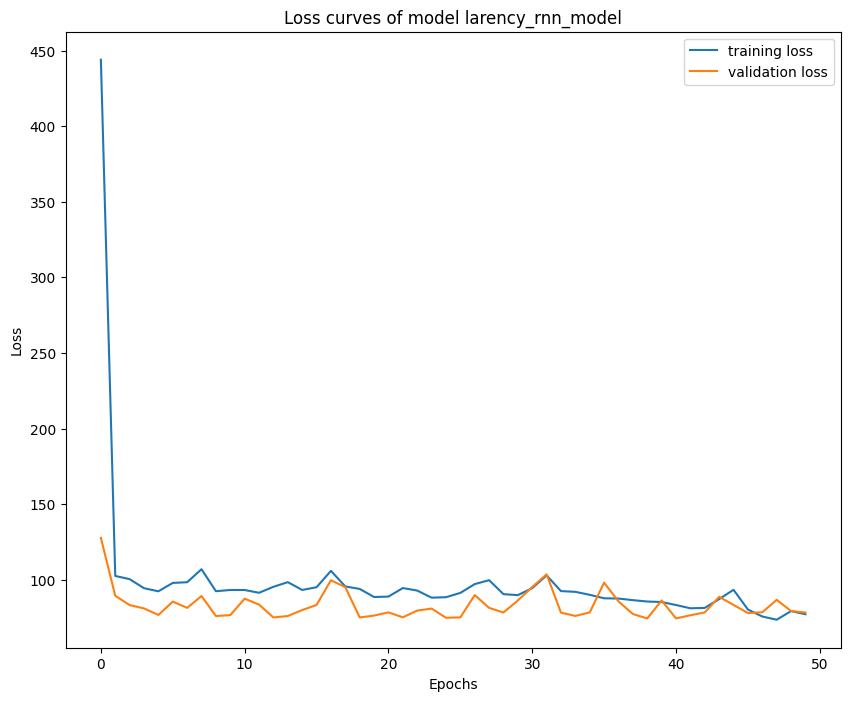

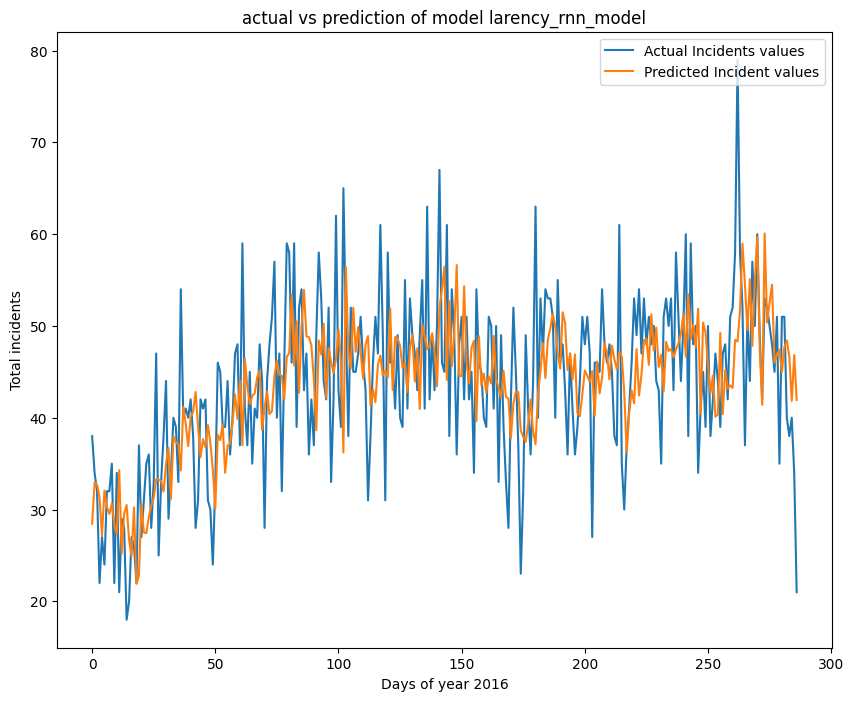

training model burglary_rnn_model 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 30, 256)           66048     
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 30, 128)           49280     
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 30, 64)            12352     
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 32)                3104      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 130817 (511.00 KB)
Trainable params: 130817 (511.00 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________________________

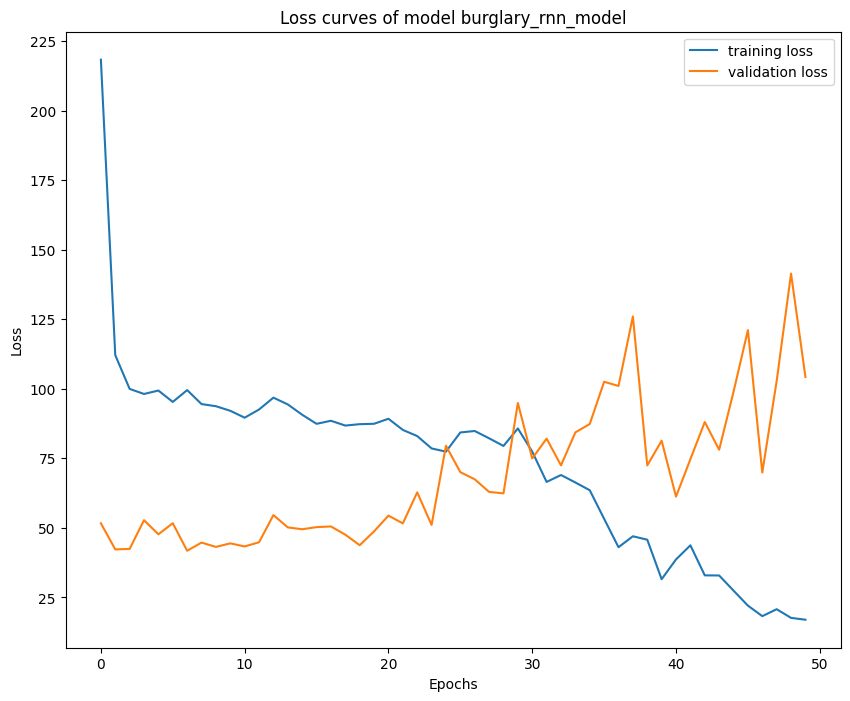

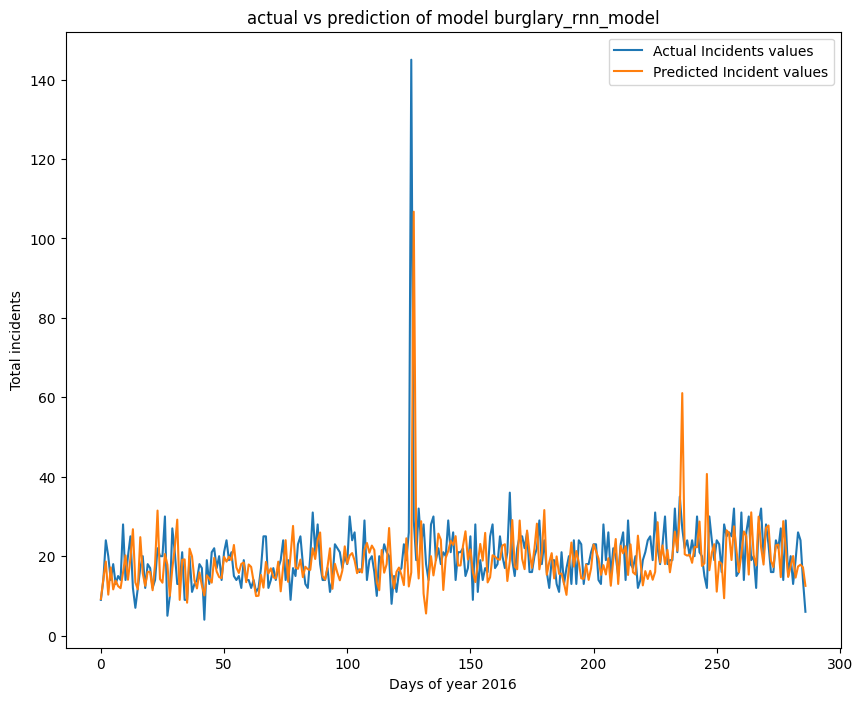

In [61]:
larency_results = train_models(larency_model,larency_train_X,larency_train_y,larency_test_X,larency_test_y)
burglary_results = train_models(burglary_model,burglary_train_X,burglary_train_y,burglary_test_X,burglary_test_y)

In [62]:
larency_df = pd.DataFrame(larency_results)
larency_df

,model_name,train_loss,valiation_loss,test_loss
0,larency_rnn_model,98.245904,83.099577,70.168381


In [63]:
burglary_df = pd.DataFrame(burglary_results)
burglary_df

,model_name,train_loss,valiation_loss,test_loss
0,burglary_rnn_model,73.375793,68.552204,128.277283
